In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import os


from actsnclass.plot_results import Canvas

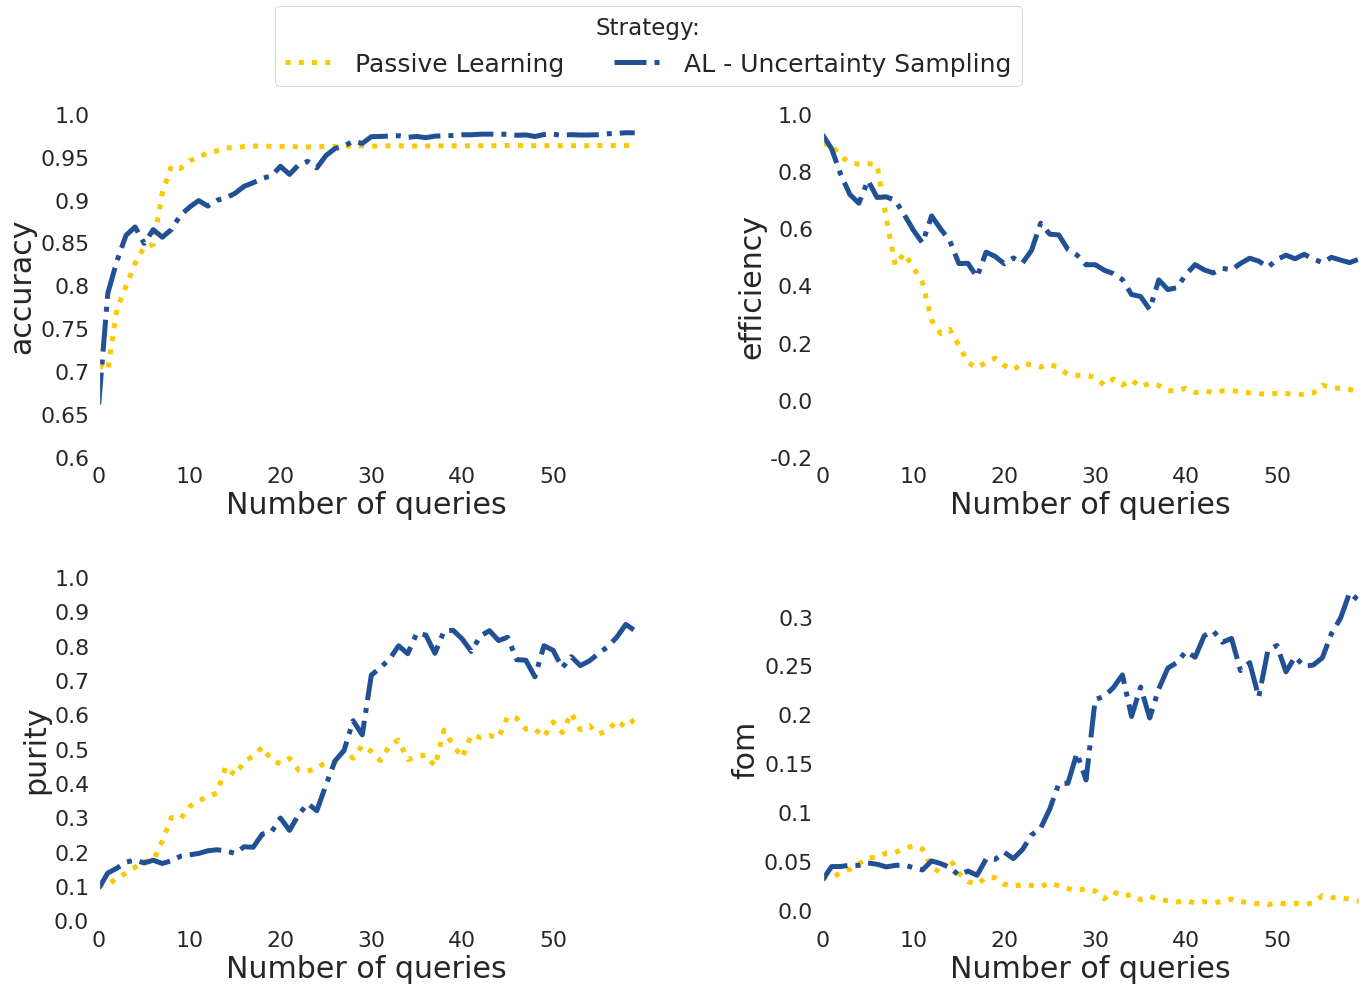

In [3]:
v = 1

strategies_list = ['RandomSampling', 'UncSampling']

dirname = 'results_42876'

path_to_files = [dirname + '/RandomSampling/metrics/metrics_RandomSampling_v' + str(v) + '.dat',
                 dirname + '/UncSampling/metrics/metrics_UncSampling_v' + str(v) + '.dat']

output_fname = 'plots/metrics_42876_' + str(v) + '.png'

# create Canvas object
cv = Canvas()

# load data
cv.load_metrics(path_to_files=path_to_files,
                strategies_list=strategies_list)

# set plot dimensions
cv.set_plot_dimensions()

# save plot to file
cv.plot_metrics(output_plot_file=output_fname,
                strategies_list=strategies_list)

# build population plots

In [4]:
flist = {}

for name in strategies_list:
    flist[name] = os.listdir(dirname + '/' + name + '/metrics/')

In [5]:
n_versions = 100

metrics = {}

for name in strategies_list:
    
    metrics[name] = {}
    
    for i in range(n_versions):
        metrics[name][i] = pd.read_csv(dirname + '/' + name + '/metrics/metrics_' + name + '_v' + str(i) + '.dat', index_col=False,
                                      sep=' ')


In [6]:
acc = {}
eff = {}
pur = {}
fom = {}

acc_mean = {}
eff_mean = {}
pur_mean = {}
fom_mean = {}

acc_std = {}
eff_std = {}
pur_std = {}
fom_std = {}

n_loops = 60

for name in strategies_list:
    acc[name] = np.array([metrics[name][i]['accuracy'].values for i in range(n_versions)])
    pur[name] = np.array([metrics[name][i]['purity'].values for i in range(n_versions)])
    eff[name] = np.array([metrics[name][i]['efficiency'].values for i in range(n_versions)])
    fom[name] = np.array([metrics[name][i]['fom'].values for i in range(n_versions)])

    acc_mean[name] = np.array([np.mean(acc[name][:,i]) for i in range(n_loops)])
    acc_std[name] = np.array([np.std(acc[name][:,i]) for i in range(n_loops)])

    pur_mean[name] = np.array([np.mean(pur[name][:,i]) for i in range(n_loops)])
    pur_std[name] = np.array([np.std(pur[name][:,i]) for i in range(n_loops)])

    eff_mean[name] = np.array([np.mean(eff[name][:,i]) for i in range(n_loops)])
    eff_std[name] = np.array([np.std(eff[name][:,i]) for i in range(n_loops)])

    fom_mean[name] = np.array([np.mean(fom[name][:,i]) for i in range(n_loops)])
    fom_std[name] = np.array([np.std(fom[name][:,i]) for i in range(n_loops)])

In [7]:
eff_mean['UncSampling'][-1]

0.4555343530793067

In [8]:
pur_mean['UncSampling'][-1]

0.8246299109027291

In [9]:
fom_mean['UncSampling'][-1]

0.2799177777602495

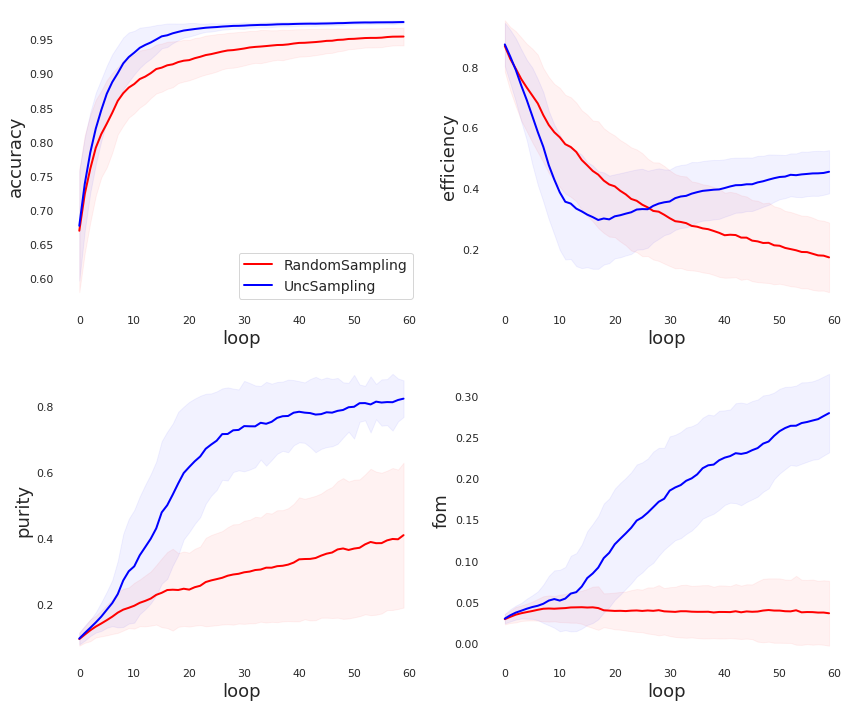

In [17]:
c = ['red', 'blue']

sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})

i = 0

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], acc_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], acc_mean[name] - acc_std[name], acc_mean[name] + acc_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('accuracy', fontsize=18)
plt.xlabel('loop', fontsize=18)
plt.legend(loc='lower right', fontsize=14)

plt.subplot(2,2,2)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], eff_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], eff_mean[name] - eff_std[name], eff_mean[name] + eff_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('efficiency', fontsize=18)
plt.xlabel('loop', fontsize=18)
#plt.legend(fontsize=14)

plt.subplot(2,2,3)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], pur_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], pur_mean[name] - pur_std[name], pur_mean[name] + pur_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('purity', fontsize=18)
plt.xlabel('loop', fontsize=18)
#plt.legend(fontsize=14)

plt.subplot(2,2,4)
for name in strategies_list:
    plt.plot(metrics[name][i]['loop'], fom_mean[name], label=name, color=c[strategies_list.index(name)], lw=2)
    plt.fill_between(metrics[name][i]['loop'], fom_mean[name] - fom_std[name], fom_mean[name] + fom_std[name], 
                     color=c[strategies_list.index(name)], alpha=0.05)
plt.ylabel('fom', fontsize=18)
plt.xlabel('loop', fontsize=18)
#plt.legend(loc='upper left',fontsize=14)

plt.tight_layout()
#plt.show()
plt.savefig('plots/metrics_42876.png')

In [21]:
acc_mean['RandomSampling'][-1]

0.9549720840049525

In [23]:
acc_std['RandomSampling'][-1]

0.013020463884366064

In [24]:
eff_mean['RandomSampling'][-1]

0.1733299130360164

In [25]:
eff_std['RandomSampling'][-1]

0.11471005473838515

In [26]:
pur_mean['RandomSampling'][-1]

0.4105899180143593

In [28]:
pur_std['RandomSampling'][-1]

0.21977277295655795

In [29]:
fom_mean['RandomSampling'][-1]

0.03661889519074084

In [30]:
fom_std['RandomSampling'][-1]

0.039428571248228586

In [31]:
acc_mean['UncSampling'][-1]

0.9762742074894291

In [32]:
acc_std['UncSampling'][-1]

0.0021823704450015737

In [33]:
eff_mean['UncSampling'][-1]

0.4555343530793067

In [34]:
eff_std['UncSampling'][-1]

0.07122949034668871

In [35]:
pur_mean['UncSampling'][-1]

0.8246299109027291

In [36]:
pur_std['UncSampling'][-1]

0.055528955974850865

In [37]:
fom_mean['UncSampling'][-1]

0.2799177777602495

In [38]:
fom_std['UncSampling'][-1]

0.047751150780722285

# AUC

In [75]:
from sklearn.metrics import roc_curve, auc
from scipy.interpolate import interp1d

In [139]:
auc_results = {}
auc_results['fpr'] = []
auc_results['tpr'] = []
auc_results['roc'] = []
auc_results['lim'] = []

xaxis = np.arange(0.1, 1.01, 0.01)

for i in range(100):

    fname_prob = 'results_42876/UncSampling/class_prob/v' + str(i) + \
                 '/class_prob_UncSampling__loop_59.csv'
    data_prob = pd.read_csv(fname_prob, index_col=False)
    
    label = data_prob['type'].values == 'Ia'
    fpr, tpr, thresholds = roc_curve(label, data_prob['prob_Ia'].values)
    roc_auc = auc(fpr, tpr)
    
    fpr_int = interp1d(thresholds, fpr)
    tpr_int = interp1d(thresholds, tpr)

    auc_results['fpr'].append(fpr_int(xaxis))
    auc_results['tpr'].append(tpr_int(xaxis))
    auc_results['roc'].append(roc_auc)
    auc_results['lim'].append(thresholds)
    
auc_results['fpr'] = np.array(auc_results['fpr'])
auc_results['tpr'] = np.array(auc_results['tpr'])
auc_results['roc'] = np.array(auc_results['roc'])

In [140]:
auc_mean = {}
auc_mean['fpr'] = [np.mean(auc_results['fpr'][:,i]) for i in range(auc_results['fpr'].shape[1])]
auc_mean['tpr'] = [np.mean(auc_results['tpr'][:,i]) for i in range(auc_results['tpr'].shape[1])]

auc_std = {}
auc_std['fpr'] = [np.std(auc_results['fpr'][:,i]) for i in range(auc_results['fpr'].shape[1])]
auc_std['tpr'] = [np.std(auc_results['tpr'][:,i]) for i in range(auc_results['tpr'].shape[1])]

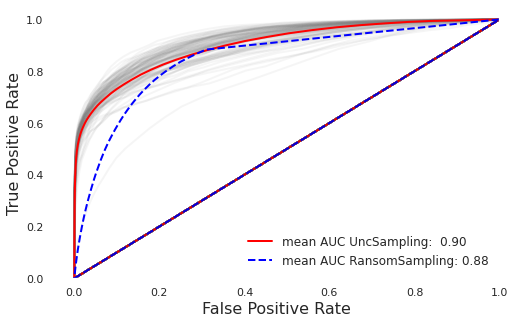

In [151]:
plt.figure(figsize=(8,5))
lw = 2
for indx in range(100):
    plt.plot([0,1] + list(auc_results['fpr'][indx]), [0,1] + list(auc_results['tpr'][indx]), color='gray',
             lw=lw, alpha=0.075)
plt.plot([0,1] + list(auc_mean['fpr']), [0,1] + list(auc_mean['tpr']), color='red',
         lw=lw, label='mean AUC UncSampling:  %0.2f' % np.mean(auc_results['roc']))
plt.plot([0,1] + list(auc_mean_rs['fpr']), [0,1] + list(auc_mean_rs['tpr']), color='blue',
         lw=lw, label='mean AUC RansomSampling: %0.2f' % np.mean(auc_results_rs['roc']), ls='--')
plt.plot([0, 1], [0, 1], color='black', lw=lw,  alpha=0.15)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.savefig('plots/roc.png')

In [52]:
fpr.shape

(751,)

In [130]:
np.mean(auc_results['roc'])

0.9041897901129992

In [131]:
np.std(auc_results['roc'])

0.026689585197490512

In [135]:
auc_results_rs = {}
auc_results_rs['fpr'] = []
auc_results_rs['tpr'] = []
auc_results_rs['roc'] = []
auc_results_rs['lim'] = []

xaxis = np.arange(0.1, 1.01, 0.01)

for i in range(100):

    fname_prob = 'results_42876/RandomSampling/class_prob/v' + str(i) + \
                 '/class_prob_RandomSampling__loop_59.csv'
    data_prob = pd.read_csv(fname_prob, index_col=False)
    
    label = data_prob['type'].values == 'Ia'
    fpr, tpr, thresholds = roc_curve(label, data_prob['prob_Ia'].values)
    roc_auc = auc(fpr, tpr)
    
    fpr_int = interp1d(thresholds, fpr)
    tpr_int = interp1d(thresholds, tpr)

    auc_results_rs['fpr'].append(fpr_int(xaxis))
    auc_results_rs['tpr'].append(tpr_int(xaxis))
    auc_results_rs['roc'].append(roc_auc)
    auc_results_rs['lim'].append(thresholds)
    
auc_results_rs['fpr'] = np.array(auc_results_rs['fpr'])
auc_results_rs['tpr'] = np.array(auc_results_rs['tpr'])
auc_results_rs['roc'] = np.array(auc_results_rs['roc'])

In [136]:
auc_mean_rs = {}
auc_mean_rs['fpr'] = [np.mean(auc_results['fpr'][:,i]) for i in range(auc_results['fpr'].shape[1])]
auc_mean_rs['tpr'] = [np.mean(auc_results['tpr'][:,i]) for i in range(auc_results['tpr'].shape[1])]

auc_std_rs = {}
auc_std_rs['fpr'] = [np.std(auc_results['fpr'][:,i]) for i in range(auc_results['fpr'].shape[1])]
auc_std_rs['tpr'] = [np.std(auc_results['tpr'][:,i]) for i in range(auc_results['tpr'].shape[1])]

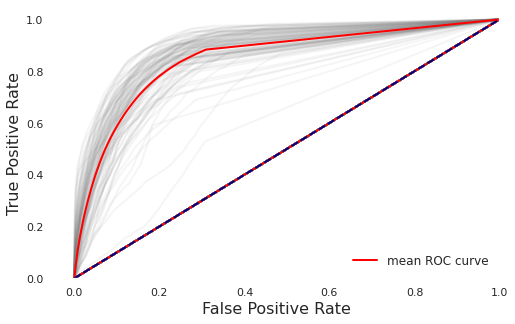

In [138]:
plt.figure(figsize=(8,5))
lw = 2
for indx in range(100):
    plt.plot([0,1] + list(auc_results_rs['fpr'][indx]), [0,1] + list(auc_results_rs['tpr'][indx]), color='gray',
             lw=lw, alpha=0.075)
plt.plot([0,1] + list(auc_mean_rs['fpr']), [0,1] + list(auc_mean_rs['tpr']), color='red',
         lw=lw, label='mean ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.savefig('plots/roc_RS.png')

In [152]:
np.mean(auc_results_rs['roc'] )

0.8763755344066817

In [153]:
np.std(auc_results_rs['roc'] )

0.03902580950239443